In [ ]:
!pip install kaggle

In [ ]:
! mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets list

ref                                                             title                                               size  lastUpdated          downloadCount  voteCount  usabilityRating  
--------------------------------------------------------------  -------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
rabieelkharoua/students-performance-dataset                     📚 Students Performance Dataset 📚                    66KB  2024-06-12 23:09:20           6535        135  1.0              
nelgiriyewithana/most-streamed-spotify-songs-2024               Most Streamed Spotify Songs 2024                   496KB  2024-06-15 18:50:51           5162        109  1.0              
shreyanshverma27/online-sales-dataset-popular-marketplace-data  Online Sales Dataset - Popular Marketplace Data      7KB  2024-05-25 23:55:26          13101        231  1.0              
anthonytherrien/restaurant-revenue-prediction-dataset           R

In [ ]:
! kaggle datasets download -d adityadesai13/used-car-dataset-ford-and-mercedes

Dataset URL: https://www.kaggle.com/datasets/adityadesai13/used-car-dataset-ford-and-mercedes
License(s): CC0-1.0
  0% 0.00/1.10M [00:00<?, ?B/s]
100% 1.10M/1.10M [00:00<00:00, 25.1MB/s]


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os,zipfile
from sklearn.linear_model import LinearRegression
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
os.mkdir('dataset')
dataset_dir = 'dataset'

In [ ]:
target_file = 'used-car-dataset-ford-and-mercedes.zip'

In [ ]:
extracting = zipfile.ZipFile(target_file, 'r')
extracting.extractall(dataset_dir)
extracting.close()

In [ ]:
for dirname, _, filenames in os.walk(dataset_dir):
    for filename in filenames:
        print(os.path.join(dirname, filename))

dataset/skoda.csv
dataset/ford.csv
dataset/merc.csv
dataset/vauxhall.csv
dataset/cclass.csv
dataset/audi.csv
dataset/unclean cclass.csv
dataset/unclean focus.csv
dataset/toyota.csv
dataset/vw.csv
dataset/focus.csv
dataset/bmw.csv
dataset/hyundi.csv


In [ ]:
os.listdir()

['.config',
 'used-car-dataset-ford-and-mercedes.zip',
 '.ipynb_checkpoints',
 'kaggle.json',
 'dataset',
 'sample_data']

In [ ]:
data= os.listdir(f"{dataset_dir}/")
print(data)

['skoda.csv', 'ford.csv', 'merc.csv', 'vauxhall.csv', 'cclass.csv', 'audi.csv', 'unclean cclass.csv', 'unclean focus.csv', 'toyota.csv', 'vw.csv', 'focus.csv', 'bmw.csv', 'hyundi.csv']


In [ ]:
for d in data:
    path=f"{dataset_dir}/"+d
    df=pd.read_csv(path)
    print(df.columns)

Index(['model', 'year', 'price', 'transmission', 'mileage', 'fuelType', 'tax',
       'mpg', 'engineSize'],
      dtype='object')
Index(['model', 'year', 'price', 'transmission', 'mileage', 'fuelType', 'tax',
       'mpg', 'engineSize'],
      dtype='object')
Index(['model', 'year', 'price', 'transmission', 'mileage', 'fuelType', 'tax',
       'mpg', 'engineSize'],
      dtype='object')
Index(['model', 'year', 'price', 'transmission', 'mileage', 'fuelType', 'tax',
       'mpg', 'engineSize'],
      dtype='object')
Index(['model', 'year', 'price', 'transmission', 'mileage', 'fuelType',
       'engineSize'],
      dtype='object')
Index(['model', 'year', 'price', 'transmission', 'mileage', 'fuelType', 'tax',
       'mpg', 'engineSize'],
      dtype='object')
Index(['model', 'year', 'price', 'transmission', 'mileage', 'fuel type',
       'engine size', 'mileage2', 'fuel type2', 'engine size2', 'reference'],
      dtype='object')
Index(['model', 'year', 'price', 'transmission', 'mileage', '

In [ ]:
bos=pd.DataFrame()
for d in data:
    path=f"{dataset_dir}/"+d
    if "unclean" not in d:
        df=pd.read_csv(path)
        df=df[['model', 'year', 'price', 'transmission', 'mileage', 'fuelType',
       'engineSize']]
        df['brand']=d.replace(".csv", "")
        bos=pd.concat([bos,df])


<ipython-input-22-47856b05986d>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['brand']=d.replace(".csv", "")


In [ ]:
year_filter = df['year']!=2060
df = df[year_filter]

In [ ]:
bos.sample(5)

,model,year,price,transmission,mileage,fuelType,engineSize,brand
4921,3 Series,2019,28990,Semi-Auto,7322,Diesel,2.0,bmw
4698,Kuga,2017,15950,Manual,24845,Diesel,2.0,ford
6432,Focus,2016,8450,Semi-Auto,46000,Petrol,1.0,ford
11303,Tiguan,2016,18491,Manual,17992,Petrol,1.4,vw
10025,GL Class,2015,18199,Automatic,21210,Diesel,2.1,merc


In [ ]:
bos['brand']=bos['brand'].str.replace('focus', "ford")

In [ ]:
bos.sample(5)

,model,year,price,transmission,mileage,fuelType,engineSize,brand
2753,Tucson,2019,15795,Manual,13980,Petrol,1.6,hyundi
4039,A Class,2016,15562,Manual,32984,Diesel,1.5,merc
682,RAV4,2005,3695,Manual,105000,Diesel,2.0,toyota
8773,Mokka X,2018,12390,Manual,19261,Petrol,1.4,vauxhall
11390,Fiesta,2017,10499,Manual,12190,Petrol,1.0,ford


In [ ]:
df=bos


In [ ]:
df.sample(3)

,model,year,price,transmission,mileage,fuelType,engineSize,brand
7508,Polo,2017,12599,Manual,9500,Petrol,1.4,vw
2915,Fabia,2019,12585,Automatic,14575,Petrol,1.0,skoda
11609,Tiguan,2017,19399,Automatic,33024,Diesel,2.0,vw


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 108540 entries, 0 to 4859
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   model         108540 non-null  object 
 1   year          108540 non-null  int64  
 2   price         108540 non-null  int64  
 3   transmission  108540 non-null  object 
 4   mileage       108540 non-null  int64  
 5   fuelType      108540 non-null  object 
 6   engineSize    108540 non-null  float64
 7   brand         108540 non-null  object 
dtypes: float64(1), int64(3), object(4)
memory usage: 7.5+ MB


In [ ]:
df.tail(3)

,model,year,price,transmission,mileage,fuelType,engineSize,brand
4857,I10,2017,6830,Manual,13810,Petrol,1.0,hyundi
4858,Tucson,2018,13994,Manual,23313,Petrol,1.6,hyundi
4859,Tucson,2016,15999,Automatic,11472,Diesel,1.7,hyundi


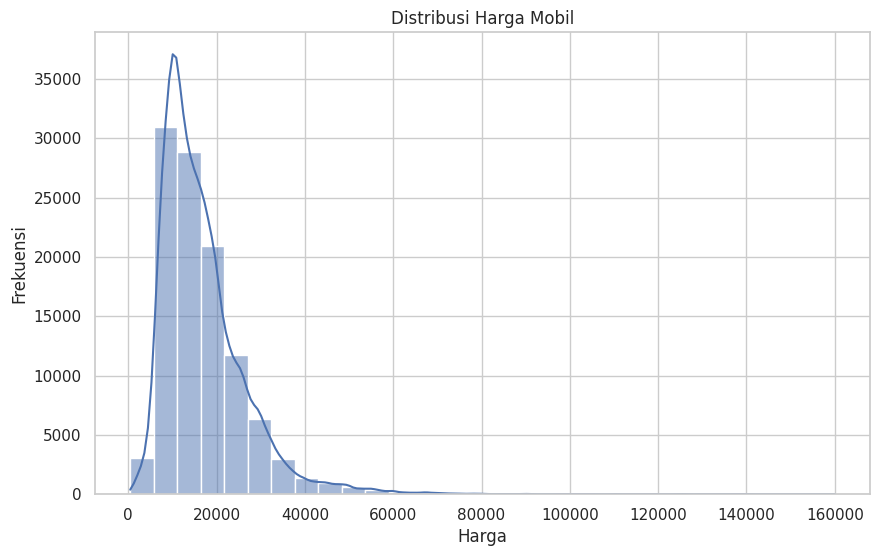

In [ ]:
# 1. Distribusi harga mobil
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], bins=30, kde=True)
plt.title('Distribusi Harga Mobil')
plt.xlabel('Harga')
plt.ylabel('Frekuensi')
plt.show()

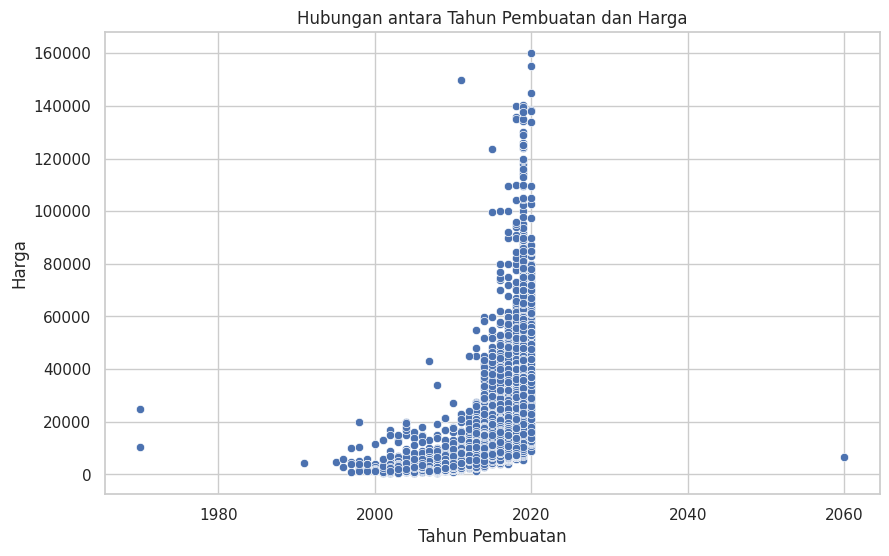

In [ ]:
# 2. Hubungan antara tahun pembuatan dan harga
plt.figure(figsize=(10, 6))
sns.scatterplot(x='year', y='price', data=df)
plt.title('Hubungan antara Tahun Pembuatan dan Harga')
plt.xlabel('Tahun Pembuatan')
plt.ylabel('Harga')
plt.show()

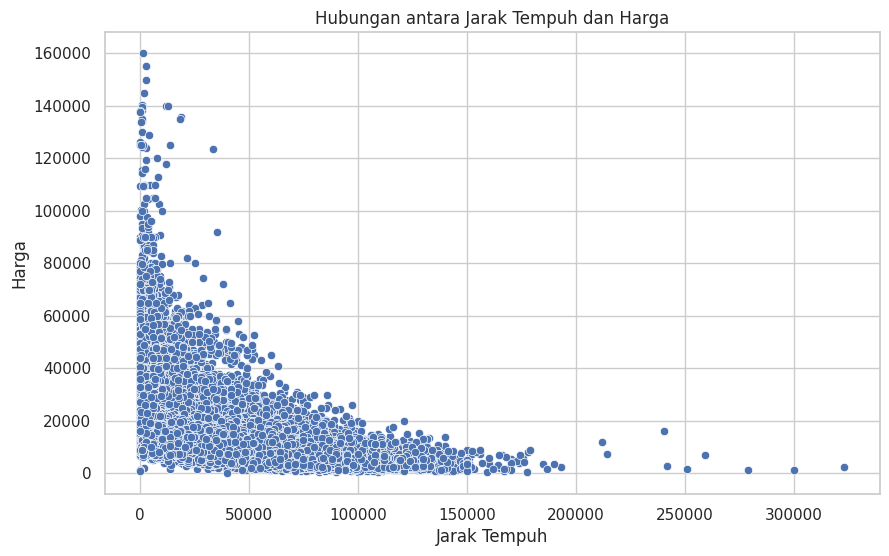

In [ ]:
# 3. Hubungan antara jarak tempuh dan harga
plt.figure(figsize=(10, 6))
sns.scatterplot(x='mileage', y='price', data=df)
plt.title('Hubungan antara Jarak Tempuh dan Harga')
plt.xlabel('Jarak Tempuh')
plt.ylabel('Harga')
plt.show()

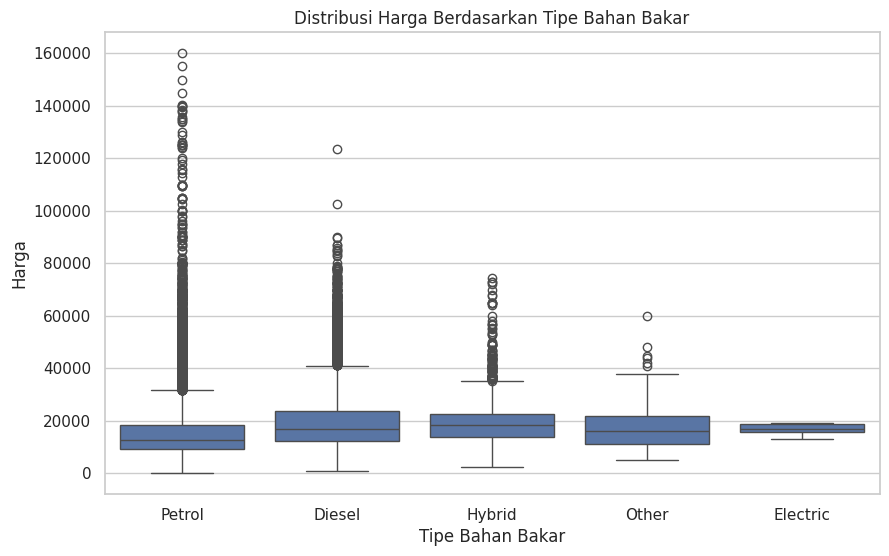

In [ ]:
# 4. Distribusi harga berdasarkan tipe bahan bakar
plt.figure(figsize=(10, 6))
sns.boxplot(x='fuelType', y='price', data=df)
plt.title('Distribusi Harga Berdasarkan Tipe Bahan Bakar')
plt.xlabel('Tipe Bahan Bakar')
plt.ylabel('Harga')
plt.show()

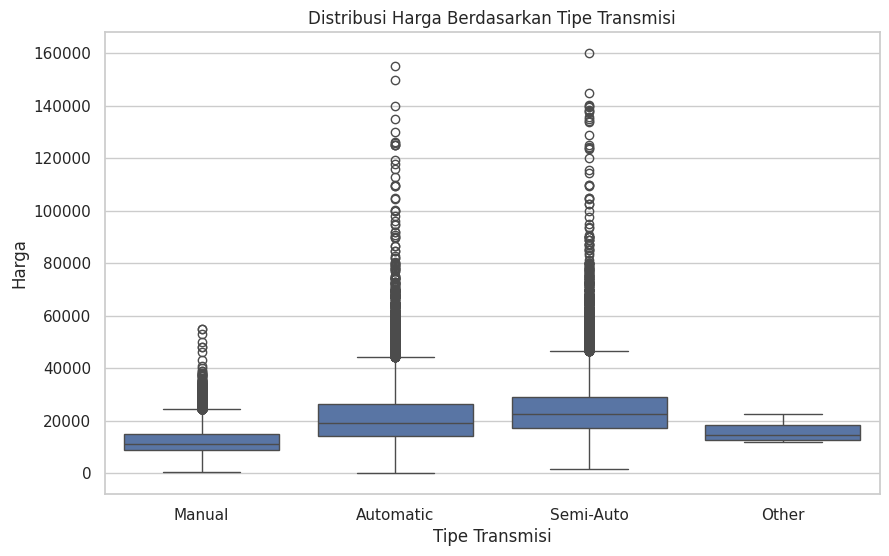

In [ ]:
# 5. Distribusi harga berdasarkan tipe transmisi
plt.figure(figsize=(10, 6))
sns.boxplot(x='transmission', y='price', data=df)
plt.title('Distribusi Harga Berdasarkan Tipe Transmisi')
plt.xlabel('Tipe Transmisi')
plt.ylabel('Harga')
plt.show()

In [ ]:
s={
    "model": "Focus",
    "year":2018,
    "price":0,
    "transmission":"Automatic",
    "mileage":40000,
    "fuelType": "Petrol",
    "engineSize": 1.6,
    "brand":"ford"
}

mycar=pd.DataFrame([s])


In [ ]:
mycar


,model,year,price,transmission,mileage,fuelType,engineSize,brand
0,Focus,2018,0,Automatic,40000,Petrol,1.6,ford


In [ ]:
df=pd.concat([df,mycar])

In [ ]:
df.tail(3)

,model,year,price,transmission,mileage,fuelType,engineSize,brand
4858,Tucson,2018,13994,Manual,23313,Petrol,1.6,hyundi
4859,Tucson,2016,15999,Automatic,11472,Diesel,1.7,hyundi
0,Focus,2018,0,Automatic,40000,Petrol,1.6,ford


In [ ]:
dfdum=pd.get_dummies(df,columns=["model","transmission","fuelType","brand"],drop_first=True)

In [ ]:
dfdum.head()

,year,price,mileage,engineSize,model_ 2 Series,model_ 3 Series,model_ 4 Series,model_ 5 Series,model_ 6 Series,model_ 7 Series,...,fuelType_Petrol,brand_bmw,brand_cclass,brand_ford,brand_hyundi,brand_merc,brand_skoda,brand_toyota,brand_vauxhall,brand_vw
0,2017,10550,25250,1.4,False,False,False,False,False,False,...,True,False,False,False,False,False,True,False,False,False
1,2018,8200,1264,1.0,False,False,False,False,False,False,...,True,False,False,False,False,False,True,False,False,False
2,2019,15650,6825,2.0,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
3,2015,14000,28431,2.0,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
4,2019,18350,10912,1.5,False,False,False,False,False,False,...,True,False,False,False,False,False,True,False,False,False


In [ ]:
prediction=dfdum.iloc[[-1]]
prediction=prediction.drop("price", axis=1)
prediciton=prediction.iloc[0]

In [ ]:
dfdum=dfdum.iloc[0:-1]
y=dfdum['price']
x=dfdum.drop('price', axis=1)

In [ ]:
lr=LinearRegression()
model=lr.fit(x,y)
model.score(x,y)

0.8529259517881373

In [ ]:
model.predict(prediction)

array([18416.02363002])